In [60]:
import pandas as pd

# Load the file
file_path = "EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena.gz"
df = pd.read_csv(file_path, sep="\t", index_col=0)

# Print basic info
print("Shape (rows x columns):", df.shape)
print("Columns (first 5):", df.columns[:5].tolist())
print("Index (first 5):", df.index[:5].tolist())
print("Data Types:")
print(df.dtypes.value_counts())

# Check for NaNs
missing = df.isna().sum().sum()
print(f"Total Missing Values: {missing}")

# Show head
print("Preview:")
print(df.iloc[:3, :5])  # first 3 rows, first 5 columns

summary = {
    "shape": df.shape,
    "columns_preview": df.columns[:5].tolist(),
    "index_preview": df.index[:5].tolist(),
    "missing_values": int(missing),
    "dtypes_summary": df.dtypes.value_counts().to_dict()
}


Shape (rows x columns): (20531, 11069)
Columns (first 5): ['TCGA-OR-A5J1-01', 'TCGA-OR-A5J2-01', 'TCGA-OR-A5J3-01', 'TCGA-OR-A5J5-01', 'TCGA-OR-A5J6-01']
Index (first 5): ['100130426', '100133144', '100134869', '10357', '10431']
Data Types:
float64    11069
Name: count, dtype: int64
Total Missing Values: 3973192
Preview:
           TCGA-OR-A5J1-01  TCGA-OR-A5J2-01  TCGA-OR-A5J3-01  TCGA-OR-A5J5-01  \
sample                                                                          
100130426             0.00             0.00             0.00             0.00   
100133144             2.09             1.88             1.45             0.00   
100134869             2.30             3.32             2.92             1.35   

           TCGA-OR-A5J6-01  
sample                      
100130426             0.00  
100133144             0.00  
100134869             2.45  


In [19]:
# Keep only primary tumor samples
pheno_df = pheno_df[pheno_df['sample_type'] == 'Primary Tumor']

# Drop missing cancer labels just in case
pheno_df = pheno_df.dropna(subset=['_primary_disease'])

# Show distribution
print(pheno_df['_primary_disease'].value_counts().head(10))

# Preview matched data
print(pheno_df.head())


_primary_disease
breast invasive carcinoma                1101
glioblastoma multiforme                   594
ovarian serous cystadenocarcinoma         592
uterine corpus endometrioid carcinoma     547
kidney clear cell carcinoma               536
head & neck squamous cell carcinoma       528
lung adenocarcinoma                       520
brain lower grade glioma                  516
thyroid carcinoma                         507
lung squamous cell carcinoma              506
Name: count, dtype: int64
                 sample_type_id    sample_type        _primary_disease
sample                                                                
TCGA-ND-A4WA-01             1.0  Primary Tumor  uterine carcinosarcoma
TCGA-NF-A5CP-01             1.0  Primary Tumor  uterine carcinosarcoma
TCGA-N8-A4PP-01             1.0  Primary Tumor  uterine carcinosarcoma
TCGA-N7-A4Y5-01             1.0  Primary Tumor  uterine carcinosarcoma
TCGA-N6-A4VE-01             1.0  Primary Tumor  uterine carcinosarcoma


In [25]:
expr_df = df  # or rename your expression matrix if it was loaded into another variable


# Step 1: Get top 10 most common cancers
top_cancers = pheno_df['_primary_disease'].value_counts().nlargest(10).index.tolist()

# Step 2: Keep only those in phenotype table
pheno_df = pheno_df[pheno_df['_primary_disease'].isin(top_cancers)]

# Step 3: Match samples between expression and phenotype
common_samples = pheno_df.index.intersection(expr_df.columns)

# Step 4: Filter both datasets
expr_df_filtered = expr_df[common_samples].copy().T  # transpose: samples as rows
pheno_df_filtered = pheno_df.loc[common_samples].copy()

# Step 5: Add cancer type as label
expr_df_filtered['cancer_type'] = pheno_df_filtered['_primary_disease'].values

# Preview
print(expr_df_filtered.shape)
print(expr_df_filtered['cancer_type'].value_counts())
expr_df_filtered.head()


(5177, 20532)
cancer_type
breast invasive carcinoma                1097
kidney clear cell carcinoma               533
uterine corpus endometrioid carcinoma     532
head & neck squamous cell carcinoma       520
brain lower grade glioma                  516
lung adenocarcinoma                       515
thyroid carcinoma                         505
lung squamous cell carcinoma              502
ovarian serous cystadenocarcinoma         303
glioblastoma multiforme                   154
Name: count, dtype: int64


sample,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,cancer_type
TCGA-EL-A3CO-01,0.0,2.35,2.38,7.26,9.39,0.0,7.37,0.00,0.76,0.0,...,7.19,6.09,8.86,10.07,5.94,10.16,13.10,10.46,9.70,thyroid carcinoma
TCGA-DJ-A13L-01,0.0,0.80,1.94,7.96,9.66,0.0,7.15,0.00,0.78,0.0,...,7.98,5.52,8.25,9.72,4.46,10.31,12.09,10.03,9.56,thyroid carcinoma
TCGA-J8-A3YF-01,0.0,3.26,3.14,7.57,9.91,0.0,7.66,1.05,2.66,0.0,...,8.65,5.74,8.00,9.97,5.86,10.19,12.34,10.26,9.38,thyroid carcinoma
TCGA-FE-A239-01,0.0,2.96,3.02,6.57,10.28,0.0,8.04,1.00,0.00,0.0,...,8.81,5.55,8.43,10.08,8.39,10.34,11.36,10.12,9.92,thyroid carcinoma
TCGA-EL-A3MY-01,0.0,3.62,2.74,5.25,9.66,0.0,7.07,0.00,0.00,0.0,...,7.86,5.81,8.69,10.18,6.05,10.69,11.97,10.19,9.67,thyroid carcinoma


In [28]:
X_log = expr_values.copy()


In [30]:
# Step: Select top 1000 most variable genes
gene_variances = X_log.var().sort_values(ascending=False)
top_genes = gene_variances.index[:1000]
X_filtered = X_log[top_genes]


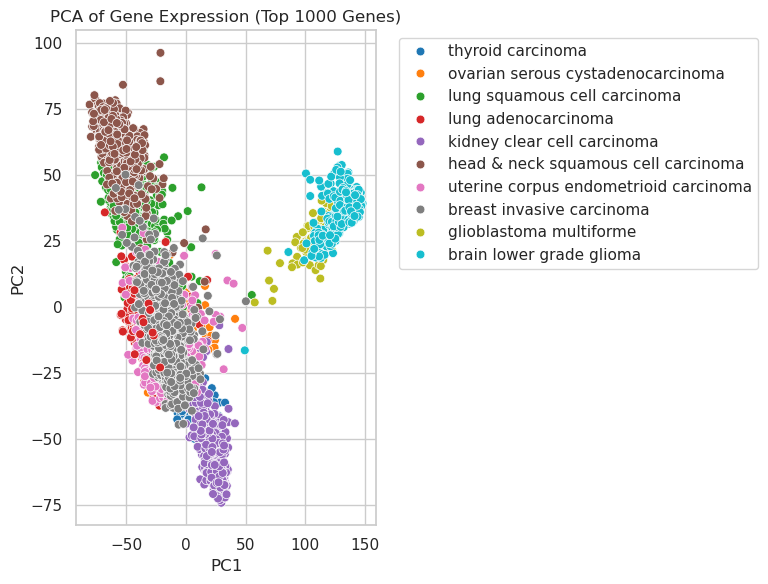

In [34]:
X_filtered = X_filtered.dropna(axis=1)  # drop genes with NaNs
y = expr_df_filtered.loc[X_filtered.index, 'cancer_type']


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='tab10', s=40)
plt.title("PCA of Gene Expression (Top 1000 Genes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



🧠 Logistic Regression Performance
Accuracy: 0.9797297297297297
Classification Report:
                                       precision    recall  f1-score   support

             brain lower grade glioma       0.96      0.99      0.98       103
            breast invasive carcinoma       1.00      1.00      1.00       220
              glioblastoma multiforme       0.97      0.90      0.93        31
  head & neck squamous cell carcinoma       0.95      1.00      0.98       104
          kidney clear cell carcinoma       1.00      0.99      1.00       107
                  lung adenocarcinoma       0.94      0.99      0.97       103
         lung squamous cell carcinoma       0.99      0.89      0.94       100
    ovarian serous cystadenocarcinoma       0.98      0.95      0.97        61
                    thyroid carcinoma       1.00      1.00      1.00       101
uterine corpus endometrioid carcinoma       0.97      0.99      0.98       106

                             accuracy     

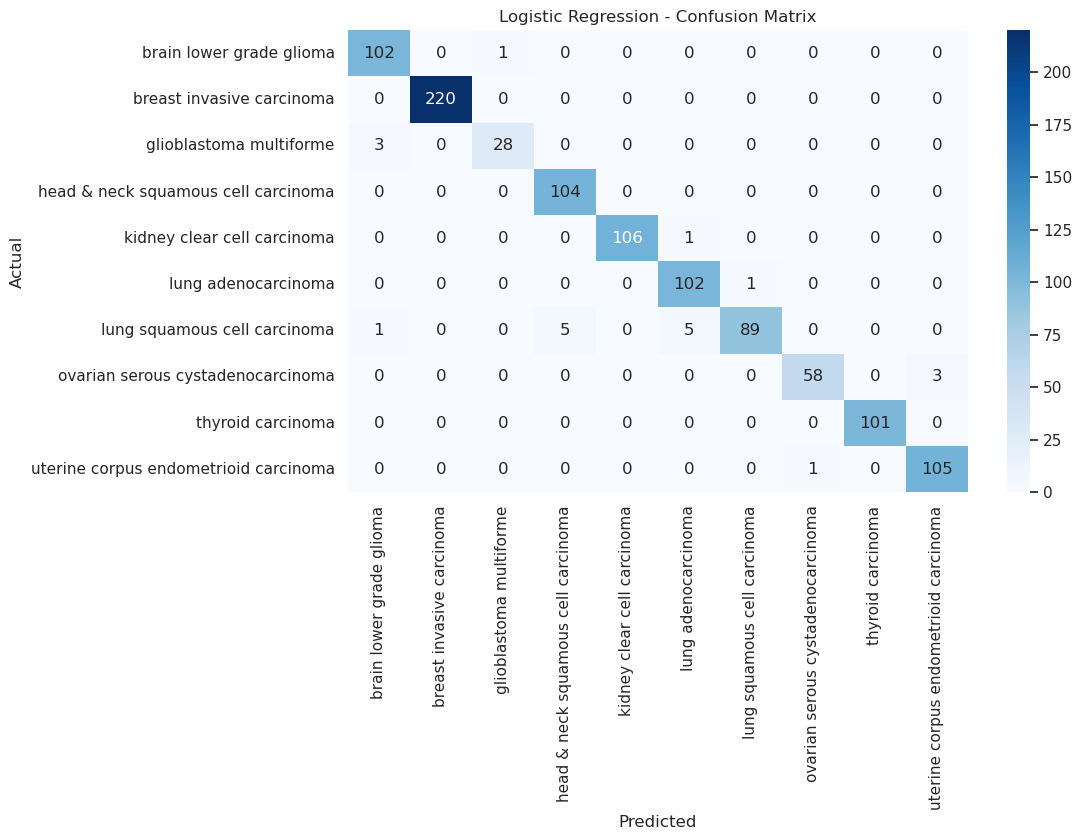


🧠 Random Forest Performance
Accuracy: 0.9758687258687259
Classification Report:
                                       precision    recall  f1-score   support

             brain lower grade glioma       0.95      0.99      0.97       103
            breast invasive carcinoma       1.00      0.99      0.99       220
              glioblastoma multiforme       0.96      0.84      0.90        31
  head & neck squamous cell carcinoma       0.93      0.99      0.96       104
          kidney clear cell carcinoma       1.00      0.99      1.00       107
                  lung adenocarcinoma       0.94      0.99      0.96       103
         lung squamous cell carcinoma       0.98      0.87      0.92       100
    ovarian serous cystadenocarcinoma       1.00      0.98      0.99        61
                    thyroid carcinoma       1.00      1.00      1.00       101
uterine corpus endometrioid carcinoma       0.99      1.00      1.00       106

                             accuracy           

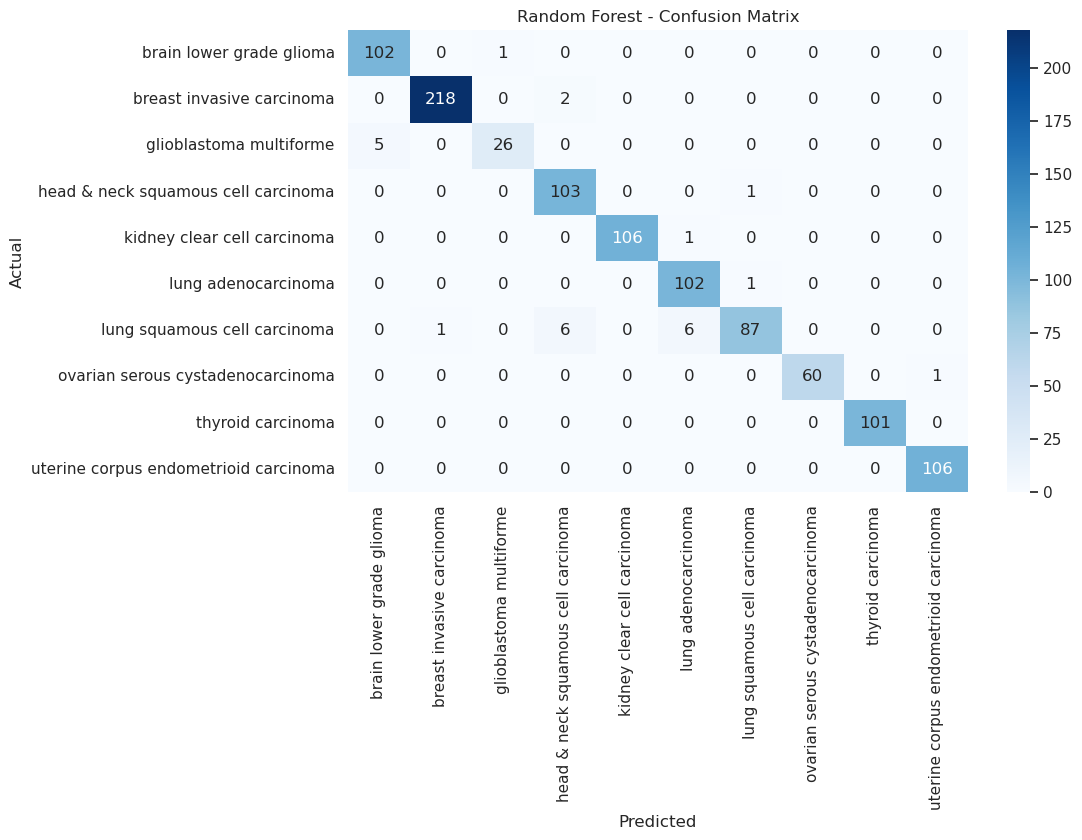


🧠 XGBoost (GPU) Performance
Accuracy: 0.9835907335907336
Classification Report:
                                       precision    recall  f1-score   support

             brain lower grade glioma       0.94      0.99      0.97       103
            breast invasive carcinoma       1.00      1.00      1.00       220
              glioblastoma multiforme       0.96      0.81      0.88        31
  head & neck squamous cell carcinoma       0.97      1.00      0.99       104
          kidney clear cell carcinoma       1.00      0.99      1.00       107
                  lung adenocarcinoma       0.95      0.99      0.97       103
         lung squamous cell carcinoma       0.99      0.93      0.96       100
    ovarian serous cystadenocarcinoma       1.00      0.98      0.99        61
                    thyroid carcinoma       1.00      1.00      1.00       101
uterine corpus endometrioid carcinoma       0.99      1.00      1.00       106

                             accuracy           

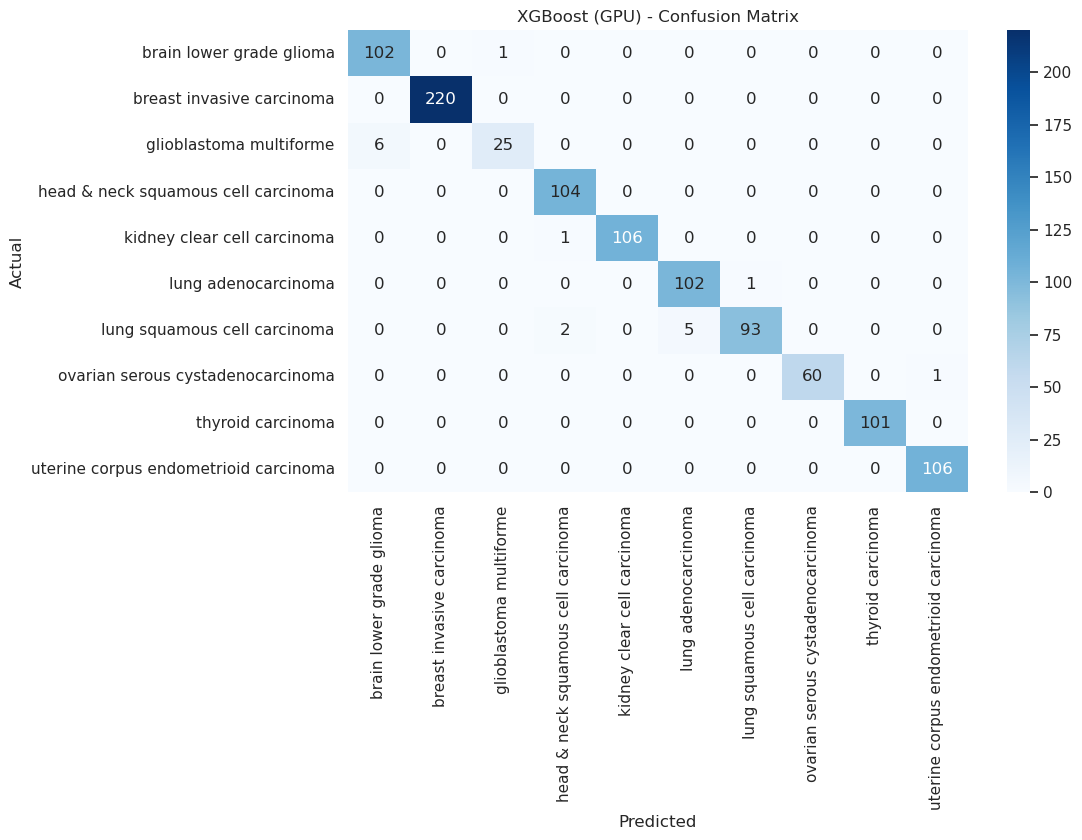

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Step 3: Define evaluation function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🧠 {name} Performance")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 4: Train Models
# Logistic Regression (CPU)
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# Random Forest (CPU)
evaluate_model(RandomForestClassifier(n_estimators=100), "Random Forest")

# XGBoost (GPU if available)
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist'), "XGBoost (GPU)")


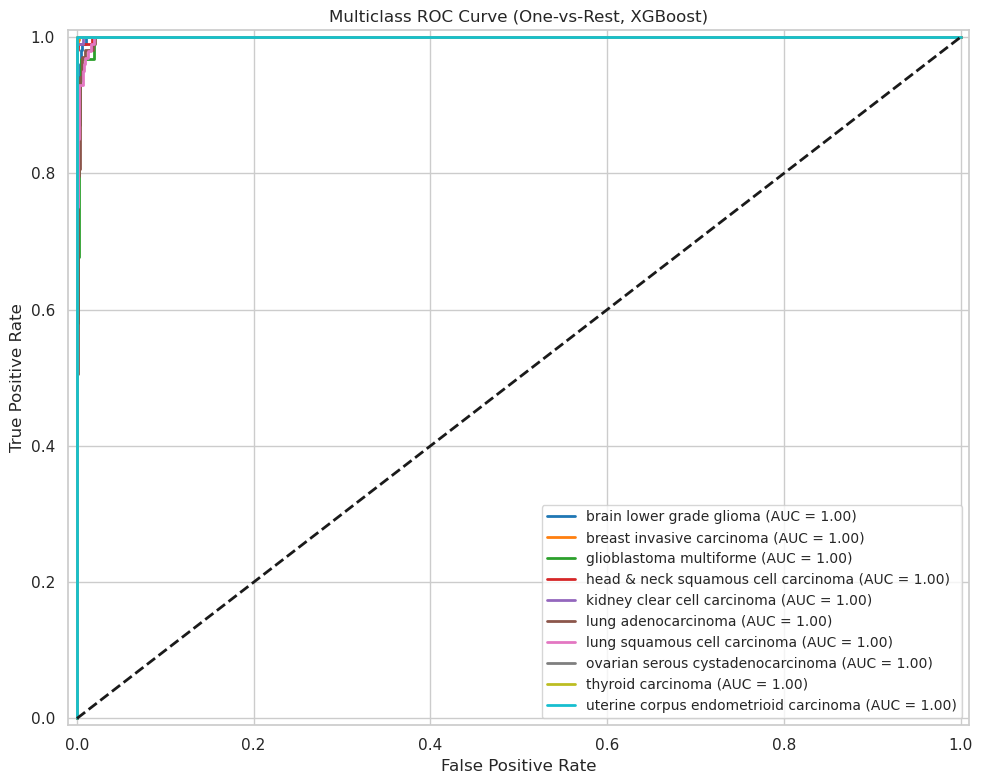

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# 1. Binarize labels
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_bin.shape[1]

# 2. Train/test split again to align
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X_filtered, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# 3. One-vs-Rest XGBoost classifier (GPU-enabled)
classifier = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist'))
y_score = classifier.fit(X_train, y_train_bin).predict_proba(X_test)

# 4. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot
plt.figure(figsize=(10, 8))
colors = cycle(plt.cm.tab10.colors)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{le.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest, XGBoost)')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


SHAP values shape: (1036, 866, 10)
X_test shape: (1036, 866)


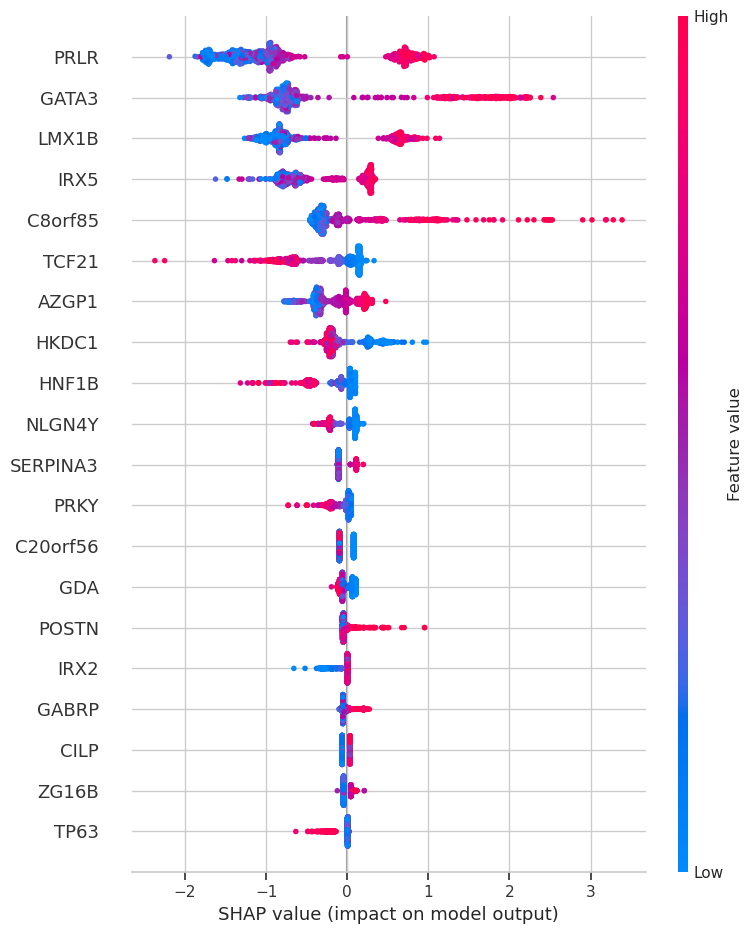

In [50]:
import shap
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='gpu_hist'
)
xgb_model.fit(X_train, y_train)

# SHAP explain
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)  # shape: (n_samples, n_features, n_classes)

# Confirm shape
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

# Pick a class (e.g. 1 = breast invasive carcinoma)
class_idx = 1
X_array = X_test.to_numpy()

# Extract values for the selected class (last axis)
shap_class = shap_values[:, :, class_idx]  # shape: (n_samples, n_features)

# Plot
shap.summary_plot(shap_class, X_array, feature_names=X_test.columns)


In [51]:
# Get mean absolute SHAP value per feature for this class
shap_class = shap_values[:, :, class_idx]
mean_abs_shap = np.abs(shap_class).mean(axis=0)

# Rank top 20
top_indices = np.argsort(mean_abs_shap)[::-1][:20]
top_genes = X_test.columns[top_indices]
top_scores = mean_abs_shap[top_indices]

# Create DataFrame
top_df = pd.DataFrame({
    'Gene': top_genes,
    'Mean |SHAP value|': top_scores
})

# Show result
print(top_df)

# Optionally save to CSV
top_df.to_csv("top20_genes_breast_invasive_carcinoma.csv", index=False)


        Gene  Mean |SHAP value|
0       PRLR           1.087915
1      GATA3           0.946751
2      LMX1B           0.804953
3       IRX5           0.539388
4    C8orf85           0.404731
5      TCF21           0.362356
6      AZGP1           0.284410
7      HKDC1           0.233880
8      HNF1B           0.206409
9     NLGN4Y           0.153503
10  SERPINA3           0.109065
11      PRKY           0.103614
12  C20orf56           0.089158
13       GDA           0.074997
14     POSTN           0.058148
15      IRX2           0.054898
16     GABRP           0.053721
17      CILP           0.048690
18     ZG16B           0.048012
19      TP63           0.045420


Top 20 predictive genes across all cancer types:


sample,TG,APC2,WT1,SFTPA1,C14orf105,PRLR,GATA3,LMX1B,SFTPB,TSHR,DLX6,KRT19,UGT2A3,ATP1B2,IRX5,FXYD2,ALDH3B2,TCF21,SFTA2,CALML3
brain lower grade glioma,0.000000,1.537162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.578598,0.029434,0.000000,0.001068,0.000000,0.000000,0.000000
breast invasive carcinoma,0.000000,0.000000,0.000000,0.000000,0.000000,1.087915,0.946751,0.804953,0.039552,0.000000,0.000000,0.000000,0.000000,0.000000,0.539388,0.000000,0.000000,0.362356,0.000000,0.000000
glioblastoma multiforme,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.632476,0.000000,0.000000,0.000000,0.000000,0.534890,0.000000,0.000000,0.000000
head & neck squamous cell carcinoma,0.000000,0.002199,0.015581,0.000000,0.000000,0.000000,0.002952,0.000000,0.261195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187555,0.000000,0.479661
kidney clear cell carcinoma,0.000000,0.000000,0.000000,0.000000,1.163639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620257,0.000000,0.000000,0.538506,0.000000,0.000000,0.000000,0.000000
lung adenocarcinoma,0.000000,0.000000,0.000000,0.796920,0.000000,0.000368,0.000000,0.001036,0.726051,0.000000,0.007323,0.000000,0.000000,0.000782,0.000000,0.000000,0.000000,0.029915,0.480395,0.095626
lung squamous cell carcinoma,0.000000,0.000000,0.120085,1.311779,0.000000,0.000000,0.006556,0.000000,0.225386,0.000000,0.006515,0.000000,0.000000,0.006629,0.000000,0.000000,0.000000,0.518208,0.000000,0.325591
ovarian serous cystadenocarcinoma,0.000000,0.000000,1.363891,0.032174,0.000000,0.003596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391407,0.000000,0.000000,0.000000,0.000000,0.002980,0.000000,0.000000
thyroid carcinoma,2.508255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.701251,0.000000,0.000000,0.000000,0.000000,0.010466,0.000000,0.000000,0.000000,0.000000,0.000000
uterine corpus endometrioid carcinoma,0.000000,0.000000,0.000000,0.072534,0.077435,0.000000,0.000000,0.000000,0.000000,0.000000,0.673348,0.000000,0.071350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


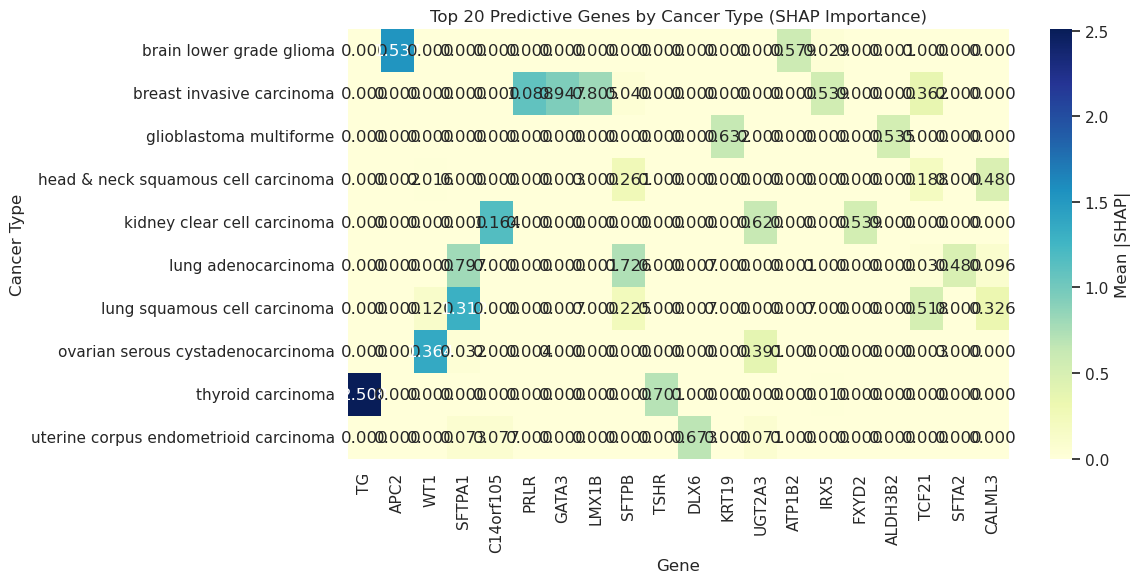

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Extract mean |SHAP| per class for all features
# shap_values shape: (n_samples, n_features, n_classes)
n_classes = shap_values.shape[2]
n_features = shap_values.shape[1]
feature_names = X_test.columns

# mean_abs_shap_all: (n_classes, n_features)
mean_abs_shap_all = np.zeros((n_classes, n_features))

for i in range(n_classes):
    mean_abs_shap_all[i] = np.abs(shap_values[:, :, i]).mean(axis=0)

# ------------------------------
# Step 2: Create DataFrame for table
shap_df = pd.DataFrame(mean_abs_shap_all, columns=feature_names, index=le.classes_)

# Get top 20 genes across all cancer types by max contribution
top_genes = shap_df.max().sort_values(ascending=False).head(20).index.tolist()
shap_top_df = shap_df[top_genes]

# ------------------------------
# Step 3: Show Table
print("Top 20 predictive genes across all cancer types:")
display(shap_top_df)

# ------------------------------
# Step 4: Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(shap_top_df, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Mean |SHAP|'})
plt.title("Top 20 Predictive Genes by Cancer Type (SHAP Importance)")
plt.xlabel("Gene")
plt.ylabel("Cancer Type")
plt.tight_layout()
plt.show()


In [53]:
import numpy as np
import pandas as pd

# Container for all top genes
top_gene_tables = []

# For each class, extract top 20 genes
for class_idx, class_name in enumerate(le.classes_):
    # Get mean |SHAP| per gene for that class
    shap_class = shap_values[:, :, class_idx]
    mean_abs_shap = np.abs(shap_class).mean(axis=0)

    # Rank top 20
    top_indices = np.argsort(mean_abs_shap)[::-1][:20]
    top_genes = X_test.columns[top_indices]
    top_scores = mean_abs_shap[top_indices]

    # Save as DataFrame
    df = pd.DataFrame({
        'Gene': top_genes,
        'Mean |SHAP|': top_scores,
        'Cancer Type': class_name
    })
    top_gene_tables.append(df)

# Combine all into one table
all_top_genes_df = pd.concat(top_gene_tables, ignore_index=True)

# Save to CSV
all_top_genes_df.to_csv("top20_genes_per_cancer_type.csv", index=False)

# Show sample
all_top_genes_df.head(10)


,Gene,Mean |SHAP|,Cancer Type
0,APC2,1.537162,brain lower grade glioma
1,ATP1B2,0.578598,brain lower grade glioma
2,PRAME,0.295488,brain lower grade glioma
3,TMEM132C,0.258256,brain lower grade glioma
4,MYH7,0.239253,brain lower grade glioma
5,NCAM1,0.220288,brain lower grade glioma
6,KCNJ10,0.171761,brain lower grade glioma
7,KCNJ15,0.168280,brain lower grade glioma
8,CAPN6,0.132891,brain lower grade glioma
9,LRP1B,0.110542,brain lower grade glioma


In [54]:
import shap

# Choose a sample index from X_test (0 to len(X_test)-1)
sample_idx = 0  # <- change this to view other samples

# Get sample's actual label
actual_class = le.inverse_transform([y_test[sample_idx]])[0]

# Get predicted probabilities
pred_probs = xgb_model.predict_proba(X_test)
pred_class = le.classes_[np.argmax(pred_probs[sample_idx])]

print(f"Sample Index: {sample_idx}")
print(f"True Cancer Type:     {actual_class}")
print(f"Predicted Cancer Type: {pred_class}")

# Extract SHAP values for this sample (all classes)
shap_sample = shap_values[sample_idx]  # shape: (n_features, n_classes)

# Pick the predicted class index
pred_idx = np.argmax(pred_probs[sample_idx])

# Explain prediction for predicted class
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[pred_idx],
    shap_values=shap_sample[:, pred_idx],
    features=X_test.iloc[sample_idx],
    feature_names=X_test.columns
)


Sample Index: 0
True Cancer Type:     kidney clear cell carcinoma
Predicted Cancer Type: kidney clear cell carcinoma


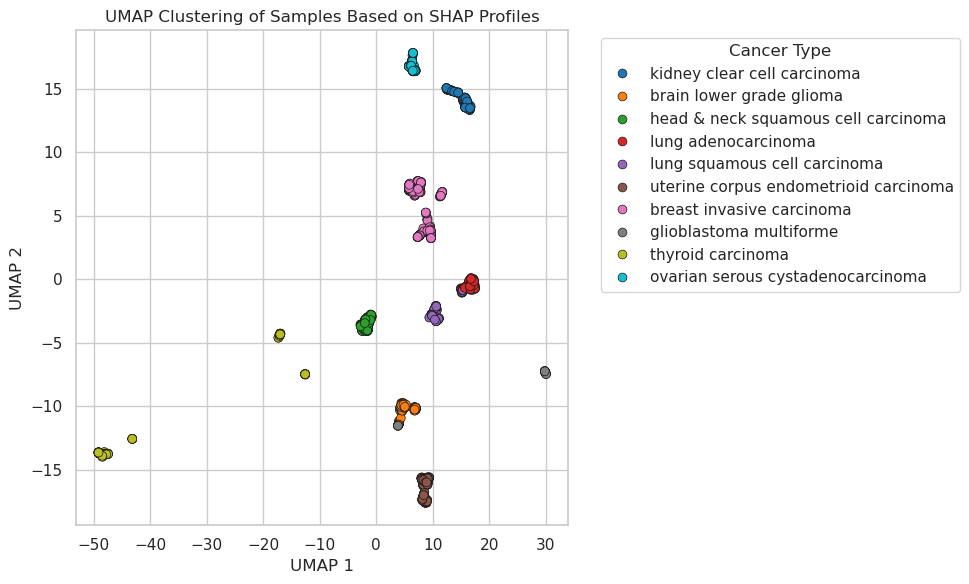

In [55]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use SHAP values for predicted class
pred_indices = np.argmax(xgb_model.predict_proba(X_test), axis=1)

# Create SHAP matrix: one SHAP vector per sample (for its predicted class)
shap_summary_matrix = np.array([
    shap_values[i, :, pred_indices[i]] for i in range(X_test.shape[0])
])

# Step 2: Run UMAP on SHAP values
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(shap_summary_matrix)

# Step 3: Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=le.inverse_transform(y_test),
                palette='tab10', s=40, edgecolor='k')
plt.title("UMAP Clustering of Samples Based on SHAP Profiles")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cancer Type')
plt.tight_layout()
plt.show()


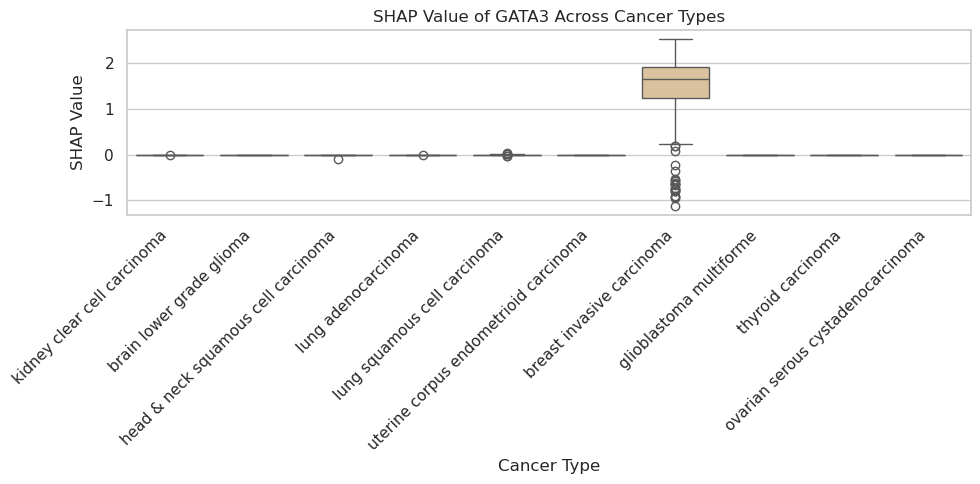

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Pick a gene
target_gene = "GATA3"  # <- change this to any gene from your top list

# Step 2: Get column index
gene_idx = list(X_test.columns).index(target_gene)

# Step 3: For each sample, extract SHAP value for its predicted class
pred_class_idx = np.argmax(xgb_model.predict_proba(X_test), axis=1)

gene_shap_values = np.array([
    shap_values[i, gene_idx, pred_class_idx[i]] for i in range(X_test.shape[0])
])

# Step 4: Combine with cancer labels
df = pd.DataFrame({
    'Cancer Type': le.inverse_transform(y_test),
    f'SHAP ({target_gene})': gene_shap_values
})

# Step 5: Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cancer Type', y=f'SHAP ({target_gene})', palette='Set2')
plt.title(f"SHAP Value of {target_gene} Across Cancer Types")
plt.xticks(rotation=45, ha='right')
plt.ylabel("SHAP Value")
plt.tight_layout()
plt.show()


In [57]:
from collections import defaultdict

# Group top 20 genes per class
top_gene_dict = defaultdict(list)

for class_idx, class_name in enumerate(le.classes_):
    shap_class = shap_values[:, :, class_idx]
    mean_abs_shap = np.abs(shap_class).mean(axis=0)
    
    top_indices = np.argsort(mean_abs_shap)[::-1][:20]
    top_genes = X_test.columns[top_indices]
    
    for gene in top_genes:
        top_gene_dict[gene].append(class_name)

# Create DataFrame summarizing gene overlap
overlap_data = []
for gene, cancers in top_gene_dict.items():
    overlap_data.append({
        'Gene': gene,
        'Cancer Count': len(cancers),
        'Cancer Types': ", ".join(sorted(cancers))
    })

overlap_df = pd.DataFrame(overlap_data)
overlap_df.sort_values('Cancer Count', ascending=False, inplace=True)

# Display
overlap_df.head(20)


,Gene,Cancer Count,Cancer Types
4,MYH7,4,"brain lower grade glioma, head & neck squamous..."
14,HOXD11,4,"brain lower grade glioma, head & neck squamous..."
64,DSC3,3,"head & neck squamous cell carcinoma, lung squa..."
2,PRAME,3,"brain lower grade glioma, glioblastoma multifo..."
58,CALML3,3,"head & neck squamous cell carcinoma, lung aden..."
92,SFTPA1,3,"lung adenocarcinoma, lung squamous cell carcin..."
62,SFTPB,3,"head & neck squamous cell carcinoma, lung aden..."
25,TCF21,3,"breast invasive carcinoma, head & neck squamou..."
31,PRKY,3,"breast invasive carcinoma, head & neck squamou..."
34,POSTN,2,"breast invasive carcinoma, glioblastoma multif..."


In [58]:
import os

# Create folder to store text files
os.makedirs("top_gene_lists", exist_ok=True)

for class_idx, class_name in enumerate(le.classes_):
    shap_class = shap_values[:, :, class_idx]
    mean_abs_shap = np.abs(shap_class).mean(axis=0)
    
    top_indices = np.argsort(mean_abs_shap)[::-1][:20]
    top_genes = X_test.columns[top_indices]
    
    # Sanitize filename
    safe_name = class_name.replace(" ", "_").replace("/", "_")
    filename = f"top_gene_lists/{safe_name}_top20_genes.txt"
    
    # Write genes to file
    with open(filename, 'w') as f:
        for gene in top_genes:
            f.write(f"{gene}\n")

print("Top gene lists saved. You can now upload them to g:Profiler or Enrichr.")


✅ Top gene lists saved. You can now upload them to g:Profiler or Enrichr.


In [64]:
import numpy as np

# Step 1: Transpose GEO expression (samples as rows)
geo_expr = df_geo.T.copy()

# Step 2: Keep only genes your model was trained on
genes_model = X_filtered.columns
common_genes = geo_expr.columns.intersection(genes_model)

# Warn if many missing
missing_genes = list(set(genes_model) - set(common_genes))
print(f"Found {len(common_genes)} genes overlapping with model")
print(f"Missing {len(missing_genes)} genes — these will be filled with 0")

# Step 3: Build aligned matrix
X_geo = geo_expr.reindex(columns=genes_model, fill_value=0)

# Step 4: Predict
geo_preds = xgb_model.predict(X_geo)
geo_probs = xgb_model.predict_proba(X_geo)

# Step 5: Decode predictions
geo_labels = le.inverse_transform(geo_preds)

# Step 6: Show results
results = pd.DataFrame({
    "Sample": X_geo.index,
    "Predicted Cancer Type": geo_labels
})

print("Predictions:")
display(results)

✅ Found 389 genes overlapping with model
⚠️ Missing 477 genes — these will be filled with 0
✅ Predictions:


,Sample,Predicted Cancer Type
0,T47D_C24_1,breast invasive carcinoma
1,T47D_C24_2,breast invasive carcinoma
2,T47D_DMSO_1,breast invasive carcinoma
3,T47D_DMSO_2,breast invasive carcinoma


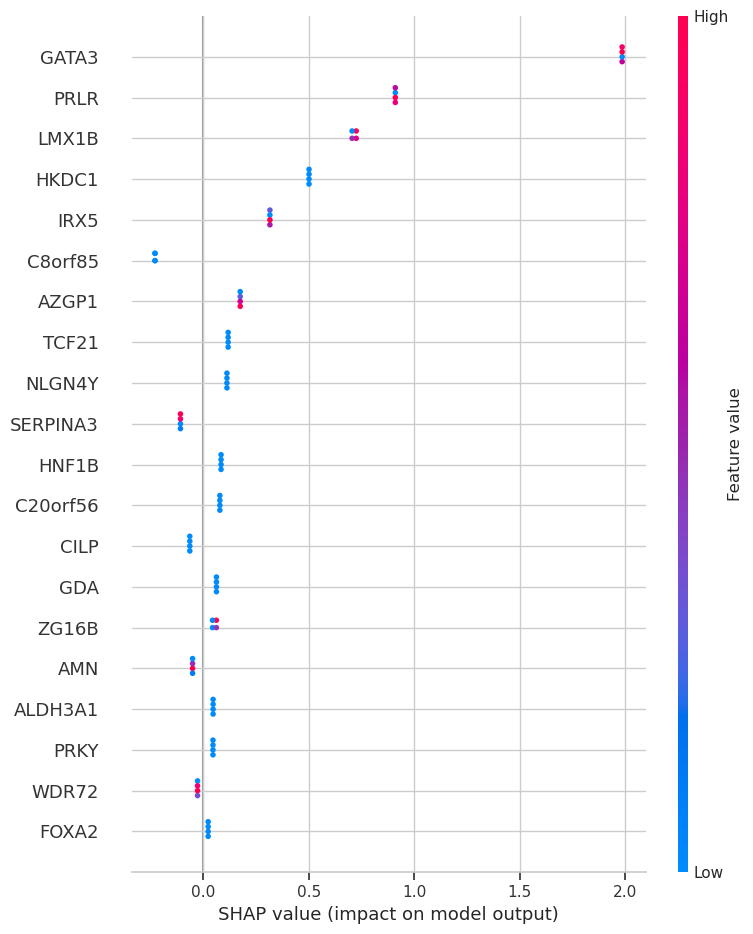

In [67]:
import shap
import numpy as np

# Step 1: Get SHAP values
explainer_geo = shap.TreeExplainer(xgb_model)
shap_geo = explainer_geo.shap_values(X_geo)  # shape: (n_samples, n_features, n_classes)

# Step 2: Get predicted class per sample
pred_idx = xgb_model.predict(X_geo)

# Step 3: Extract SHAP values for predicted class (sample-wise)
shap_matrix = np.array([
    shap_geo[i, :, pred_idx[i]] for i in range(X_geo.shape[0])
])

# Step 4: Plot summary for all GEO samples
shap.summary_plot(shap_matrix, X_geo.values, feature_names=X_geo.columns)